In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# read in the data 
df = pd.read_csv("chicago_taxi.csv")

# select only pickup longiture and latitude
df = df.loc[:, ['Pickup Centroid Longitude', 'Pickup Centroid Latitude']]

# drop missing values from the dataframe
df = df.dropna()
df

,Pickup Centroid Longitude,Pickup Centroid Latitude
0,-87.633308,41.899602
1,-87.633308,41.899602
2,-87.633308,41.899602
3,-87.626215,41.892508
4,-87.663518,41.874005
...,...,...
292776,-87.655998,41.944227
292777,-87.663518,41.874005
292778,-87.663518,41.874005
292779,-87.626215,41.892508


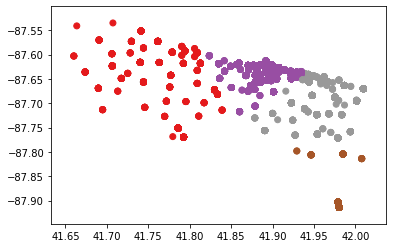

In [48]:
# The model I would have liked to use for this classification problem was DBSCAN but I run into a Memory error bacause of the
# size of the data. 

#This is the next model I want to use and, as you can see from the picture, there are close clusters that 
# are classified as 2 separate clusters.

from sklearn.cluster import KMeans

# define cluster parameters
n_clusters = 4
n_init = 10
max_iter = 100
tol = 0.0001
random_state = 663

# initiate KMeans and fit the data
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
mean_distance = kmeans.fit_transform(df)

# Scatterplot of KMeans classification
plt.figure()
plt.scatter(x = 'Pickup Centroid Latitude', y = 'Pickup Centroid Longitude',c = kmeans.labels_, data = df, cmap = "Set1")
plt.show()

# this is the result I expected to get. KMeans splits classifications that are close to each other because it needs to fit 
# all the data into the n_cluster parameter we set for it. 

In [45]:
# here is DBSCAN with a smaller dataset.

df = df.iloc[:30000, :]

from sklearn.cluster import DBSCAN

# set DBSCAN Parameters: set so we get 4 classes to compare with KMeans
max_dist = 0.03
hoodsize = 300

# instatiate DBSCAN and fit
cluster = DBSCAN(eps = max_dist, min_samples = hoodsize, leaf_size = 100)
cluster.fit(df)

DBSCAN(algorithm='auto', eps=0.03, leaf_size=100, metric='euclidean',
       metric_params=None, min_samples=300, n_jobs=None, p=None)

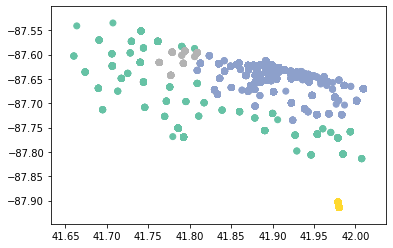

In [47]:
# scatterplot of DBSCAN's classification
plt.figure()
plt.scatter(x = 'Pickup Centroid Latitude', y = 'Pickup Centroid Longitude', c = cluster.labels_, data = df, cmap = "Set2")
plt.show()